# Introduction

In the age of data and machine learning, banks are using machine learning to help them better decide which customers are eligible for bank credit.   
In this exercise we will see how data science will be used to meet their needs. 

# Exploratary data Analysis

In [269]:
# Load necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
# For the image quality of the graphic. 
sns.set(rc={"figure.dpi":600})
# For the size of the graphics
sns.set(rc = {"figure.figsize":(6,3)})
sns.set(font_scale=0.5)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 50)
import warnings
warnings.filterwarnings('ignore')

In [126]:
# Loading dataSets
appRec = pd.read_csv('records/application_record.csv')
creRec = pd.read_csv('records/credit_record.csv')

In [127]:
# Glimps of data available
# application_record.csv
appRec.head()

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0        Civil marriage   Rented apartment      -12005          -4542   
1        Civil marriage   Rented apartment      -12005          -4542   
2               Married  House / apartment      -21474          -1134   
3  Single / not married  House / apartment      -19110          -3051   
4  Single / not married  House / apartment      -19110          -3051   

   FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0           1                1           0           0             NaN   
1           1                1           0           0             NaN   
2           1                0           0           0  Security staff   
3           1                0           1           1     Sales staff   
4           1                0           1           1     Sales staff   

   CNT_FAM_MEMBERS  
0              2.0  
1              2.0  
2              2.0  
3              1.0  
4              1.0

In [128]:
print(f'Application record file contain {appRec.shape[0]} rows and {appRec.shape[1]} columns with {appRec.shape[0] - appRec.ID.nunique() } dupplicated IDs ')

Application record file contain 438557 rows and 18 columns with 47 dupplicated IDs 


In [129]:
# application_record.csv
creRec.head()

ID  MONTHS_BALANCE STATUS
0  5001711               0      X
1  5001711              -1      0
2  5001711              -2      0
3  5001711              -3      0
4  5001712               0      C

In [130]:
print(f'Credit_record file contain {creRec.shape[0]} rows and {creRec.shape[1]} columns')

Credit_record file contain 1048575 rows and 3 columns


### Content & Explanation

There're two tables could be merged by ID:

* **application_record.csv**

<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>Feature name</th>      <th>Explanation</th>      <th>Remarks</th>    </tr>  </thead>  <tbody>    <tr>      <th>0</th>      <td>ID</td>      <td>Client number</td>      <td></td>    </tr>    <tr>      <th>1</th>      <td>CODE_GENDER</td>      <td>Gender</td>      <td></td>    </tr>    <tr>      <th>2</th>      <td>FLAG_OWN_CAR</td>      <td>Is there a car</td>      <td></td>    </tr>    <tr>      <th>3</th>      <td>FLAG_OWN_REALTY</td>      <td>Is there a property</td>      <td></td>    </tr>    <tr>      <th>4</th>      <td>CNT_CHILDREN</td>      <td>Number of children</td>      <td></td>    </tr>    <tr>      <th>5</th>      <td>AMT_INCOME_TOTAL</td>      <td>Annual income</td>      <td></td>    </tr>    <tr>      <th>6</th>      <td>NAME_INCOME_TYPE</td>      <td>Income category</td>      <td></td>    </tr>    <tr>      <th>7</th>      <td>NAME_EDUCATION_TYPE</td>      <td>Education level</td>      <td></td>    </tr>    <tr>      <th>8</th>      <td>NAME_FAMILY_STATUS</td>      <td>Marital status</td>      <td></td>    </tr>    <tr>      <th>9</th>      <td>NAME_HOUSING_TYPE</td>      <td>Way of living</td>      <td></td>    </tr>    <tr>      <th>10</th>      <td>DAYS_BIRTH</td>      <td>Birthday</td>      <td>Count backwards from current day (0), -1 means yesterday</td>    </tr>    <tr>      <th>11</th>      <td>DAYS_EMPLOYED</td>      <td>Start date of employment</td>      <td>Count backwards from current day(0). If positive, it means the person currently unemployed.</td>    </tr>    <tr>      <th>12</th>      <td>FLAG_MOBIL</td>      <td>Is there a mobile phone</td>      <td></td>    </tr>    <tr>      <th>13</th>      <td>FLAG_WORK_PHONE</td>      <td>Is there a work phone</td>      <td></td>    </tr>    <tr>      <th>14</th>      <td>FLAG_PHONE</td>      <td>Is there a phone</td>      <td></td>    </tr>    <tr>      <th>15</th>      <td>FLAG_EMAIL</td>      <td>Is there an email</td>      <td></td>    </tr>    <tr>      <th>16</th>      <td>OCCUPATION_TYPE</td>      <td>Occupation</td>      <td></td>    </tr>    <tr>      <th>17</th>      <td>CNT_FAM_MEMBERS</td>      <td>Family size</td>      <td></td>    </tr>  </tbody></table>

* **credit_record.csv**

<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>Feature name</th>      <th>Explanation</th>      <th>Remarks</th>    </tr>  </thead>  <tbody>    <tr>      <th>0</th>      <td>ID</td>      <td>Client number</td>      <td></td>    </tr>    <tr>      <th>1</th>      <td>MONTHS_BALANCE</td>      <td>Record month</td>      <td>The month of the extracted data is the starting point, backwards, 0 is the current month, -1 is the previous month, and so on</td>    </tr>    <tr>      <th>2</th>      <td>STATUS</td>      <td>Status</td>      <td>0: 1-29 days past due 1: 30-59 days past due 2: 60-89 days overdue 3: 90-119 days overdue 4: 120-149 days overdue 5: Overdue or bad debts, write-offs for more than 150 days C: paid off that month X: No loan for the month</td>    </tr>  </tbody></table>


source: [Kaggle](https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction)

As we can see there is two dataframes one represent information presented by the clients, and the other represent their credit history.

Let's check if data is complete:

In [131]:
for c in appRec.columns:
    na = appRec[c].isna().sum()
    if na != 0:
        print(f'Column {c} contain: {na} Na s')

Column OCCUPATION_TYPE contain: 134203 Na s


Only column OCCUPATION_TYPE that contain NA values

In [132]:
for c in creRec.columns:
    na = creRec[c].isna().sum()
    if na != 0:
        print(f'Column {c} contain: {na} Na s')

credit record doesn't contain any NULL

let's check if creRec and appRec share same ID

In [133]:
len(set(appRec.ID).intersection(set(creRec.ID)))

36457

36457 application left from 438557. so we have only credit history for 36457 application

In [137]:
# removing clients without history
appRec = appRec.merge(creRec[['ID']].drop_duplicates(),on='ID',how='inner')
creRec = creRec.merge(appRec[['ID']].drop_duplicates(),on='ID',how='inner')

In [283]:
appRec.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'groupedID'],
      dtype='object')

In [286]:
appRec[['ID', 'CODE_GENDER', 'DAYS_BIRTH','DAYS_EMPLOYED','FLAG_OWN_CAR','CNT_CHILDREN','AMT_INCOME_TOTAL','NAME_FAMILY_STATUS','NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE','FLAG_OWN_REALTY', 
        
        'NAME_HOUSING_TYPE', 
        'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'groupedID']].head(100)

ID CODE_GENDER  DAYS_BIRTH  DAYS_EMPLOYED FLAG_OWN_CAR  CNT_CHILDREN  \
0   5008804           M      -12005          -4542            Y             0   
1   5008805           M      -12005          -4542            Y             0   
2   5008806           M      -21474          -1134            Y             0   
3   5008808           F      -19110          -3051            N             0   
4   5008809           F      -19110          -3051            N             0   
5   5008810           F      -19110          -3051            N             0   
6   5008811           F      -19110          -3051            N             0   
7   5008812           F      -22464         365243            N             0   
8   5008813           F      -22464         365243            N             0   
9   5008814           F      -22464         365243            N             0   
10  5008815           M      -16872           -769            Y             0   
11  5112956           M      -16872           -769            Y             0   
12  5008819           M      -17778          -1194            Y             0   
13  5008820           M      -17778          -1194            Y             0   
14  5008821           M      -17778          -1194            Y             0   
15  5008822           M      -17778          -1194            Y             0   
16  5008823           M      -17778          -1194            Y             0   
17  5008824           M      -17778          -1194            Y             0   
18  5008825           F      -10669          -1103            Y             0   
19  5008826           F      -10669          -1103            Y             0   
20  5008830           F      -10031          -1469            N             0   
21  5008831           F      -10031          -1469            N             0   
22  5008832           F      -10031          -1469            N             0   
23  5008834           F      -10968          -1620            N             1   
24  5008835           F      -10968          -1620            N             1   
25  5008836           M      -12689          -1163            Y             3   
26  5008837           M      -12689          -1163            Y             3   
27  5008838           M      -11842          -2016            N             1   
28  5008839           M      -11842          -2016            N             1   
29  5008840           M      -11842          -2016            N             1   
30  5008841           M      -11842          -2016            N             1   
31  5008842           M      -11842          -2016            N             1   
32  5008843           M      -11842          -2016            N             1   
33  5008844           M      -20502          -4450            Y             0   
34  5008846           M      -20502          -4450            Y             0   
35  5008847           M      -20502          -4450            Y             0   
36  5008849           M      -20502          -4450            Y             0   
37  5008850           M      -20502          -4450            Y             0   
38  5008851           M      -20502          -4450            Y             0   
39  5008852           M      -20502          -4450            Y             0   
40  5008853           M      -20502          -4450            Y             0   
41  5008854           F      -15761          -3173            Y             2   
42  5008855           F      -15761          -3173            Y             2   
43  5008856           F      -15761          -3173            Y             2   
44  5008857           F      -15761          -3173            Y             2   
45  5008858           F      -15761          -3173            Y             2   
46  5008859           F      -15761          -3173            Y             2   
47  5008860           F      -15761          -3173            Y             2   
48  5008861           F      -15761     

Data is **duplicayed** for different ID. 5008804 is **similair** to 5008805.  
- how many duplication do we Have ? Let's answer that question.  
We need first to fill null values of **NAME_INCOME_TYPE** to make sure that we won't lost them while grouping

In [138]:
appRec.OCCUPATION_TYPE.fillna('NULL',inplace=True) #let's name them null for now,

In [139]:
columns = list(set(appRec.columns) - set(['ID'])) # removing ID

In [140]:
GroupingID =( appRec
             .groupby(columns)
             .agg({'ID':list})
             .reset_index(drop=True)
             .reset_index()
             .rename({'index':'groupedID'},axis=1)
             .explode('ID')
            )

In [141]:
# let's select random groupe
appRec = appRec.merge(GroupingID,on='ID')

In [142]:

appRec[appRec.groupedID==250]

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
1387  5010542           F            Y               Y             0   
1388  5010543           F            Y               Y             0   
1389  5010544           F            Y               Y             0   
1390  5010545           F            Y               Y             0   
1391  5010546           F            Y               Y             0   
1392  5010547           F            Y               Y             0   
1393  5010548           F            Y               Y             0   
1394  5010549           F            Y               Y             0   
1395  5010551           F            Y               Y             0   
1396  5010553           F            Y               Y             0   

      AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
1387          315000.0  Commercial associate  Secondary / secondary special   
1388          315000.0  Commercial associate  Secondary / secondary special   
1389          315000.0  Commercial associate  Secondary / secondary special   
1390          315000.0  Commercial associate  Secondary / secondary special   
1391          315000.0  Commercial associate  Secondary / secondary special   
1392          315000.0  Commercial associate  Secondary / secondary special   
1393          315000.0  Commercial associate  Secondary / secondary special   
1394          315000.0  Commercial associate  Secondary / secondary special   
1395          315000.0  Commercial associate  Secondary / secondary special   
1396          315000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
1387          Separated  House / apartment      -18184          -3021   
1388          Separated  House / apartment      -18184          -3021   
1389          Separated  House / apartment      -18184          -3021   
1390          Separated  House / apartment      -18184          -3021   
1391          Separated  House / apartment      -18184          -3021   
1392          Separated  House / apartment      -18184          -3021   
1393          Separated  House / apartment      -18184          -3021   
1394          Separated  House / apartment      -18184          -3021   
1395          Separated  House / apartment      -18184          -3021   
1396          Separated  House / apartment      -18184          -3021   

      FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
1387           1                0           1           1        Laborers   
1388           1                0           1           1        Laborers   
1389           1                0           1           1        Laborers   
1390           1                0           1           1        Laborers   
1391           1                0           1           1        Laborers   
1392           1                0           1           1        Laborers   
1393           1                0           1           1        Laborers   
1394           1                0           1           1        Laborers   
1395           1                0           1           1        Laborers   
1396           1                0           1           1        Laborers   

      CNT_FAM_MEMBERS  groupedID  
1387              1.0        250  
1388              1.0        250  
1389              1.0        250  
1390              1.0        250  
1391              1.0        250  
1392              1.0        250  
1393              1.0        250  
1394              1.0        250  
1395              1.0        250  
1396              1.0        250

their id is continues  and they have all the same data, day of birth, salary, At this point they might have the same name and same parents, maybe it's same user with **different account** ?   
Let's go with this theory.  
(PS: I check so many others all are in the same situation which led me to beleive all these different applications are by the same person)

In [143]:
#Let's check their record data
creRec = creRec.merge(GroupingID, on = 'ID',how = 'inner')

In [144]:
creRec.shape

(777715, 4)

In [145]:
creRec[creRec.groupedID == 250]

ID  MONTHS_BALANCE STATUS  groupedID
29237  5010542             -42      X        250
29238  5010542             -43      X        250
29239  5010542             -44      X        250
29240  5010542             -45      X        250
29241  5010542             -46      X        250
29242  5010543              -5      X        250
29243  5010543              -6      0        250
29244  5010543              -7      0        250
29245  5010543              -8      0        250
29246  5010543              -9      0        250
29247  5010543             -10      0        250
29248  5010543             -11      0        250
29249  5010543             -12      X        250
29250  5010543             -13      0        250
29251  5010543             -14      X        250
29252  5010543             -15      X        250
29253  5010544              -6      X        250
29254  5010544              -7      X        250
29255  5010544              -8      X        250
29256  5010544              -9      0        250
29257  5010544             -10      0        250
29258  5010544             -11      X        250
29259  5010544             -12      0        250
29260  5010544             -13      X        250
29261  5010544             -14      0        250
29262  5010544             -15      X        250
29263  5010545               0      X        250
29264  5010545              -1      X        250
29265  5010545              -2      X        250
29266  5010545              -3      X        250
29267  5010545              -4      X        250
29268  5010545              -5      X        250
29269  5010545              -6      X        250
29270  5010545              -7      X        250
29271  5010545              -8      X        250
29272  5010545              -9      X        250
29273  5010545             -10      X        250
29274  5010545             -11      X        250
29275  5010545             -12      X        250
29276  5010545             -13      X        250
29277  5010545             -14      X        250
29278  5010545             -15      X        250
29279  5010546               0      X        250
29280  5010546              -1      X        250
29281  5010546              -2      X        250
29282  5010546              -3      X        250
29283  5010546              -4      X        250
29284  5010546              -5      X        250
29285  5010546              -6      X        250
29286  5010546              -7      X        250
29287  5010546              -8      X        250
29288  5010546              -9      X        250
29289  5010546             -10      X        250
29290  5010546             -11      X        250
29291  5010546             -12      X        250
29292  5010546             -13      X        250
29293  5010546             -14      X        250
29294  5010546             -15      X        250
29295  5010546             -16      X        250
29296  5010546             -17      X        250
29297  5010546             -18      X        250
29298  5010546             -19      X        250
29299  5010546             -20      X        250
29300  5010546             -21      X        250
29301  5010547               0      0        250
29302  5010547              -1      0        250
29303  5010547              -2      0        250
29304  5010547              -3      0        250
29305  5010547              -4      0        250
29306  5010548             -32      C        250
29307  5010548             -33      C        250
29308  5010548             -34      C        250
29309  5010548             -35      C        250
29310  5010548             -36      0        250
29311  5010548             -37      X        250
29312  5010548             -38      0        250
29313  5010548             -39      X        250
29314  5010549               0      X        250
29315  5010549              -1      X        250
29316  5010549              -2      X        250
29317  5010549              -3      X      

different same application with different credit history.

In [146]:
creRec.MONTHS_BALANCE += 60 # to adjust and remove negatif values

In [147]:
creRec.shape

(777715, 4)

- We have two data sets that are related with ID columns.   
- Since our data sets it isn't labeled, we need to create labes out selfs.  
- As hinted in the tasks labels need to be 'good' or 'bad' in other worlds 0 or 1 classification problem.  
- Let's start working creRec and try to establish understanding of credit history from different clients.  

for our sake of understanding it's better to change the status based on the risk level for example:  

- 0 will represent STATUS C and X since they won't represent risk.  
- 1 will represent the current STATUS 0   
- etc..  

In [148]:
replacement = { str(i):i+2 for i in range(6)}
replacement.update({'X':0, 'C':1})
creRec.STATUS = creRec.STATUS.replace(replacement)

In [151]:
# Let's see the worst scenario of the population
aggCredit = (pd
             .DataFrame(creRec.groupby('ID').agg({'STATUS':'max'}).STATUS.value_counts())
             .reset_index()
             .rename({'index':'worst_status','STATUS':'count'},axis=1)
            )

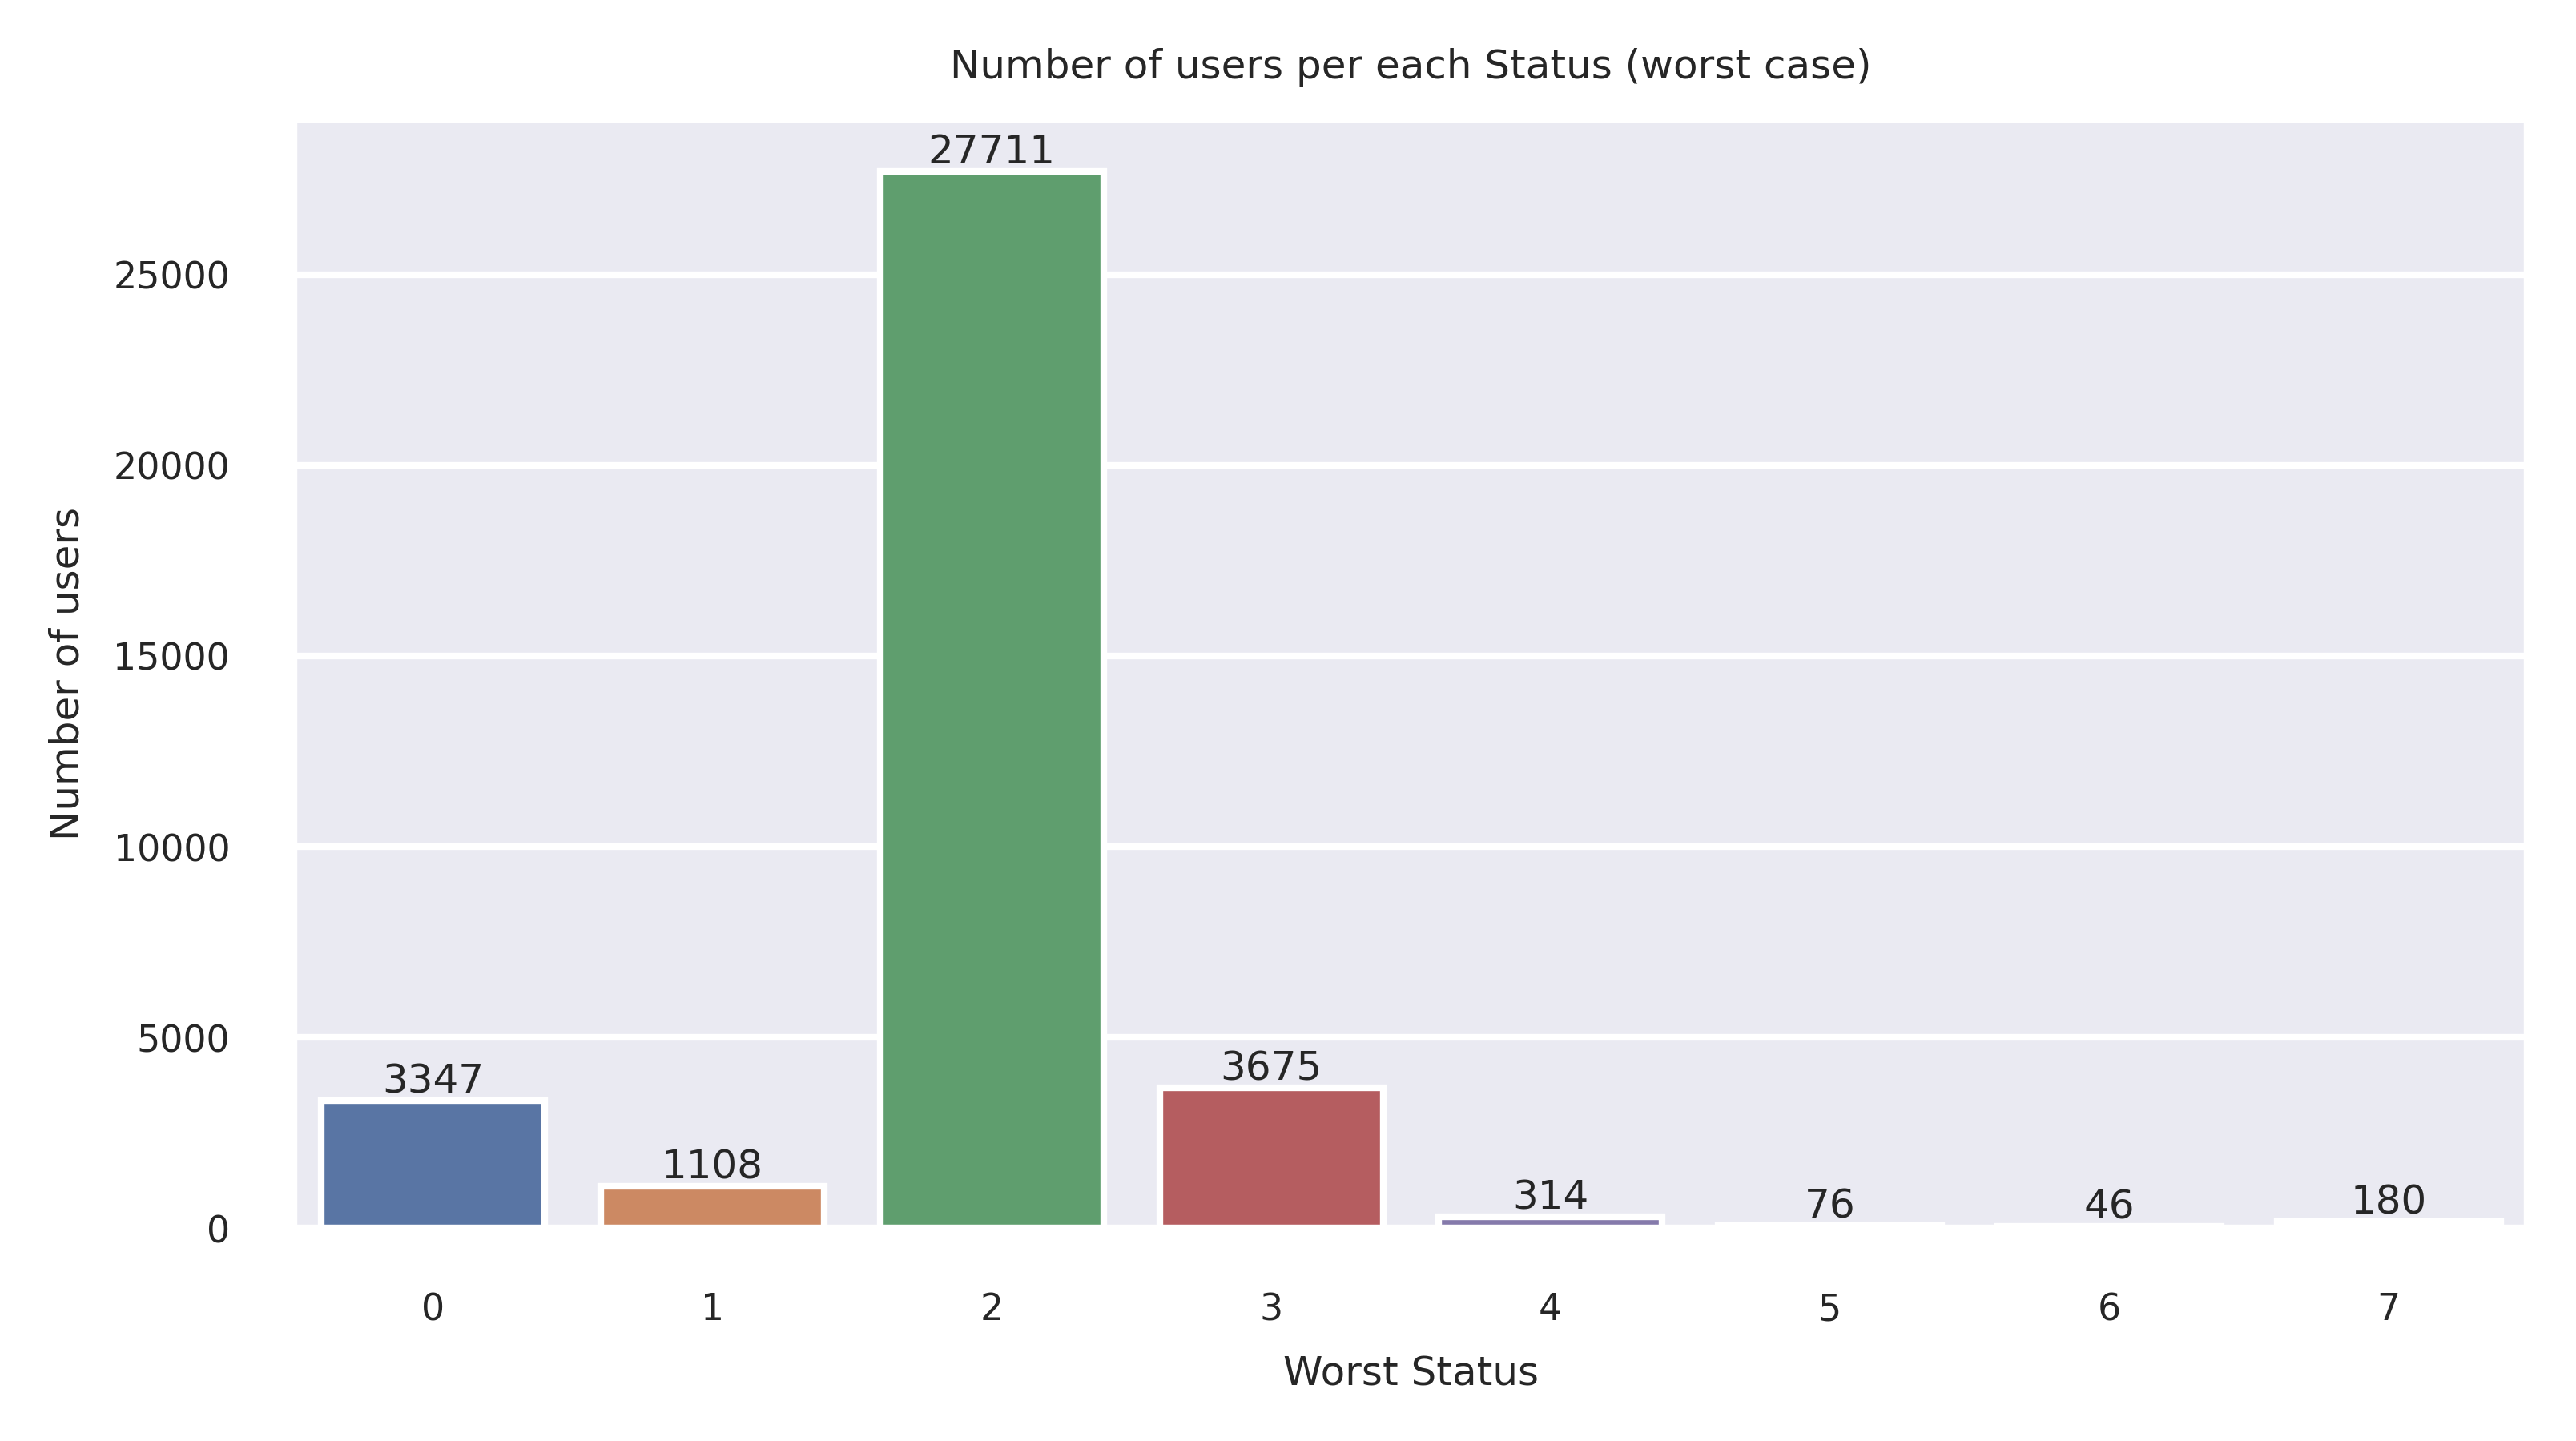

In [152]:
plot = sns.barplot(x = "worst_status", y = "count", data = aggCredit)
plot.set(xlabel='Worst Status', ylabel='Number of users')
plot.set_title('Number of users per each Status (worst case)')
for i in plot.containers:
    plot.bar_label(i,)

The plot above show that users that had at most Status 2 (-29 days past due) represent ~ 88 % of our dataset $\frac{3347 + 1108 +27711 }{36457}  $.  
And in case we consider that Status 3 is good debt then we will have $ \frac{3347+1108+27711+3675}{36457}   $  ~ 98%  

In [160]:
def groupF(x):
    """
    function take dataframe as input and transform to retreive pandas series
    """
    d = {}
    d['MONTHS_BALANCE_Close'] = x['MONTHS_BALANCE'].max()
    d['MONTHS_BALANCE_Open'] = x['MONTHS_BALANCE'].min()
    d['groupedID'] = x['groupedID'].min()
    return pd.Series(d, index=['MONTHS_BALANCE_Close', 'MONTHS_BALANCE_Open', 'groupedID'])

In [161]:
#application on aggregation
R = (creRec
     .groupby('ID')
     .apply(groupF)
     .reset_index()
    )

In [162]:
R.head()

ID  MONTHS_BALANCE_Close  MONTHS_BALANCE_Open  groupedID
0  5008804                    60                   45       6632
1  5008805                    60                   46       6632
2  5008806                    60                   31       6738
3  5008808                    60                   56        241
4  5008809                    38                   34        241

In [163]:
R = R.merge(creRec)

In [165]:
R.head()

ID  MONTHS_BALANCE_Close  MONTHS_BALANCE_Open  groupedID  \
0  5008804                    60                   45       6632   
1  5008804                    60                   45       6632   
2  5008804                    60                   45       6632   
3  5008804                    60                   45       6632   
4  5008804                    60                   45       6632   

   MONTHS_BALANCE  STATUS  
0              60       1  
1              59       1  
2              58       1  
3              57       1  
4              56       1

In [167]:
def ExtraInfo(x):
    #Function to retreive information of before each application  
    ListBucket = [{1:0,0:0,'Active':0,'opened':0} for i in range(61)] #create empty bucket list
    
    for i in x[['MONTHS_BALANCE','STATUS']].values: 
        A = ListBucket[i[0]]
        A['Active'] +=1             #if there is activity we note that month that client have credit card

        if i[1]<=3:
            A[0]+=1                       # count good credit 
        else:
            A[1]+=1                          # count bad credit 

    for  i in x[['ID','MONTHS_BALANCE_Open']].drop_duplicates().values:
        A=ListBucket[i[1]]  
        A['opened']+=1  # note when he opened account
        
    x=x.sort_values(['ID','MONTHS_BALANCE'],ascending=True)
    droped = x[['ID','MONTHS_BALANCE_Open']].drop_duplicates().values 
    m = x.MONTHS_BALANCE_Open.min()
    # series of empy buckets 
    KK = [[] for i in range(len(droped))]
    OO = [[] for i in range(len(droped))]
    FF = [[] for i in range(len(droped))]

    idx = [0] * len(droped)
    active = [0]* len(droped)
    for i,v  in enumerate(droped):
        KK[i] = sum([i[0] for i in  ListBucket[m:v[1]+1]])   
        FF[i] = sum([i[1] for i in  ListBucket[m:v[1]+1]])
        OO[i] = sum([i['opened'] for i in  ListBucket[m:v[1]+1]])
        idx[i]=v[0]
        active[i] = ListBucket[v[1]]['Active']
    Last =  pd.DataFrame.from_dict({'ID':idx,'numerber0':KK,'Flaged':FF,'OpenedAcc':OO,'Active':active})
    return Last

In [168]:
#application function ExtracInfo on R based on entire client and all it's credit application
# naming variable is not important. 
M = R.groupby('groupedID').apply(ExtraInfo)

In [171]:
M = (M
     .reset_index()
     .drop(columns=['level_1'])
     .merge(appRec,on='ID')
    )

In [177]:
M = (M
     .rename({'groupedID_x':'groupedID'},axis=1)
     .drop(columns='groupedID_y')
    )

In [180]:
R.STATUS = [int(i>3) for i in R.STATUS]

In [184]:
M2  = M.merge(R.groupby('ID').agg({'STATUS':max,'MONTHS_BALANCE_Open':min}),on='ID')

In [185]:
#Example of the same user
M2[M2.groupedID==250].sort_values('numerber0')

groupedID       ID  numerber0  Flaged  OpenedAcc  Active CODE_GENDER  \
969        250  5010542          2       0          2       2           F   
976        250  5010549          2       0          2       2           F   
975        250  5010548         14       0          3       2           F   
973        250  5010546         40       0          4       2           F   
970        250  5010543         55       0          7       5           F   
971        250  5010544         55       0          7       5           F   
972        250  5010545         55       0          7       5           F   
978        250  5010553         86       0          8       6           F   
977        250  5010551        105       0          9       7           F   
974        250  5010547        117       0         10       6           F   

    FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  \
969            Y               Y             0          315000.0   
976            Y               Y             0          315000.0   
975            Y               Y             0          315000.0   
973            Y               Y             0          315000.0   
970            Y               Y             0          315000.0   
971            Y               Y             0          315000.0   
972            Y               Y             0          315000.0   
978            Y               Y             0          315000.0   
977            Y               Y             0          315000.0   
974            Y               Y             0          315000.0   

         NAME_INCOME_TYPE            NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  \
969  Commercial associate  Secondary / secondary special          Separated   
976  Commercial associate  Secondary / secondary special          Separated   
975  Commercial associate  Secondary / secondary special          Separated   
973  Commercial associate  Secondary / secondary special          Separated   
970  Commercial associate  Secondary / secondary special          Separated   
971  Commercial associate  Secondary / secondary special          Separated   
972  Commercial associate  Secondary / secondary special          Separated   
978  Commercial associate  Secondary / secondary special          Separated   
977  Commercial associate  Secondary / secondary special          Separated   
974  Commercial associate  Secondary / secondary special          Separated   

     NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  FLAG_MOBIL  \
969  House / apartment      -18184          -3021           1   
976  House / apartment      -18184          -3021           1   
975  House / apartment      -18184          -3021           1   
973  House / apartment      -18184          -3021           1   
970  House / apartment      -18184          -3021           1   
971  House / apartment      -18184          -3021           1   
972  House / apartment      -18184          -3021           1   
978  House / apartment      -18184          -3021           1   
977  House / apartment      -18184          -3021           1   
974  House / apartment      -18184          -3021           1   

     FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
969                0           1           1        Laborers              1.0   
976                0           1           1        Laborers              1.0   
975                0           1           1        Laborers              1.0   
973                0           1           1        Laborers              1.0   
970                0           1           1        Laborers              1.0   
971                0           1           1        Laborers              1.0   
972                0           1           1        Laborers              1.0   
978                0           1           1        Laborers              1.0   
977                0           1           1        Laborers              1.0   
974         

In [188]:
#create non duplicated newAppRec
newAppRec = appRec.drop(columns=['ID']).drop_duplicates()

Text(0.5, 1.0, 'Clients income distrubution by occupation type')

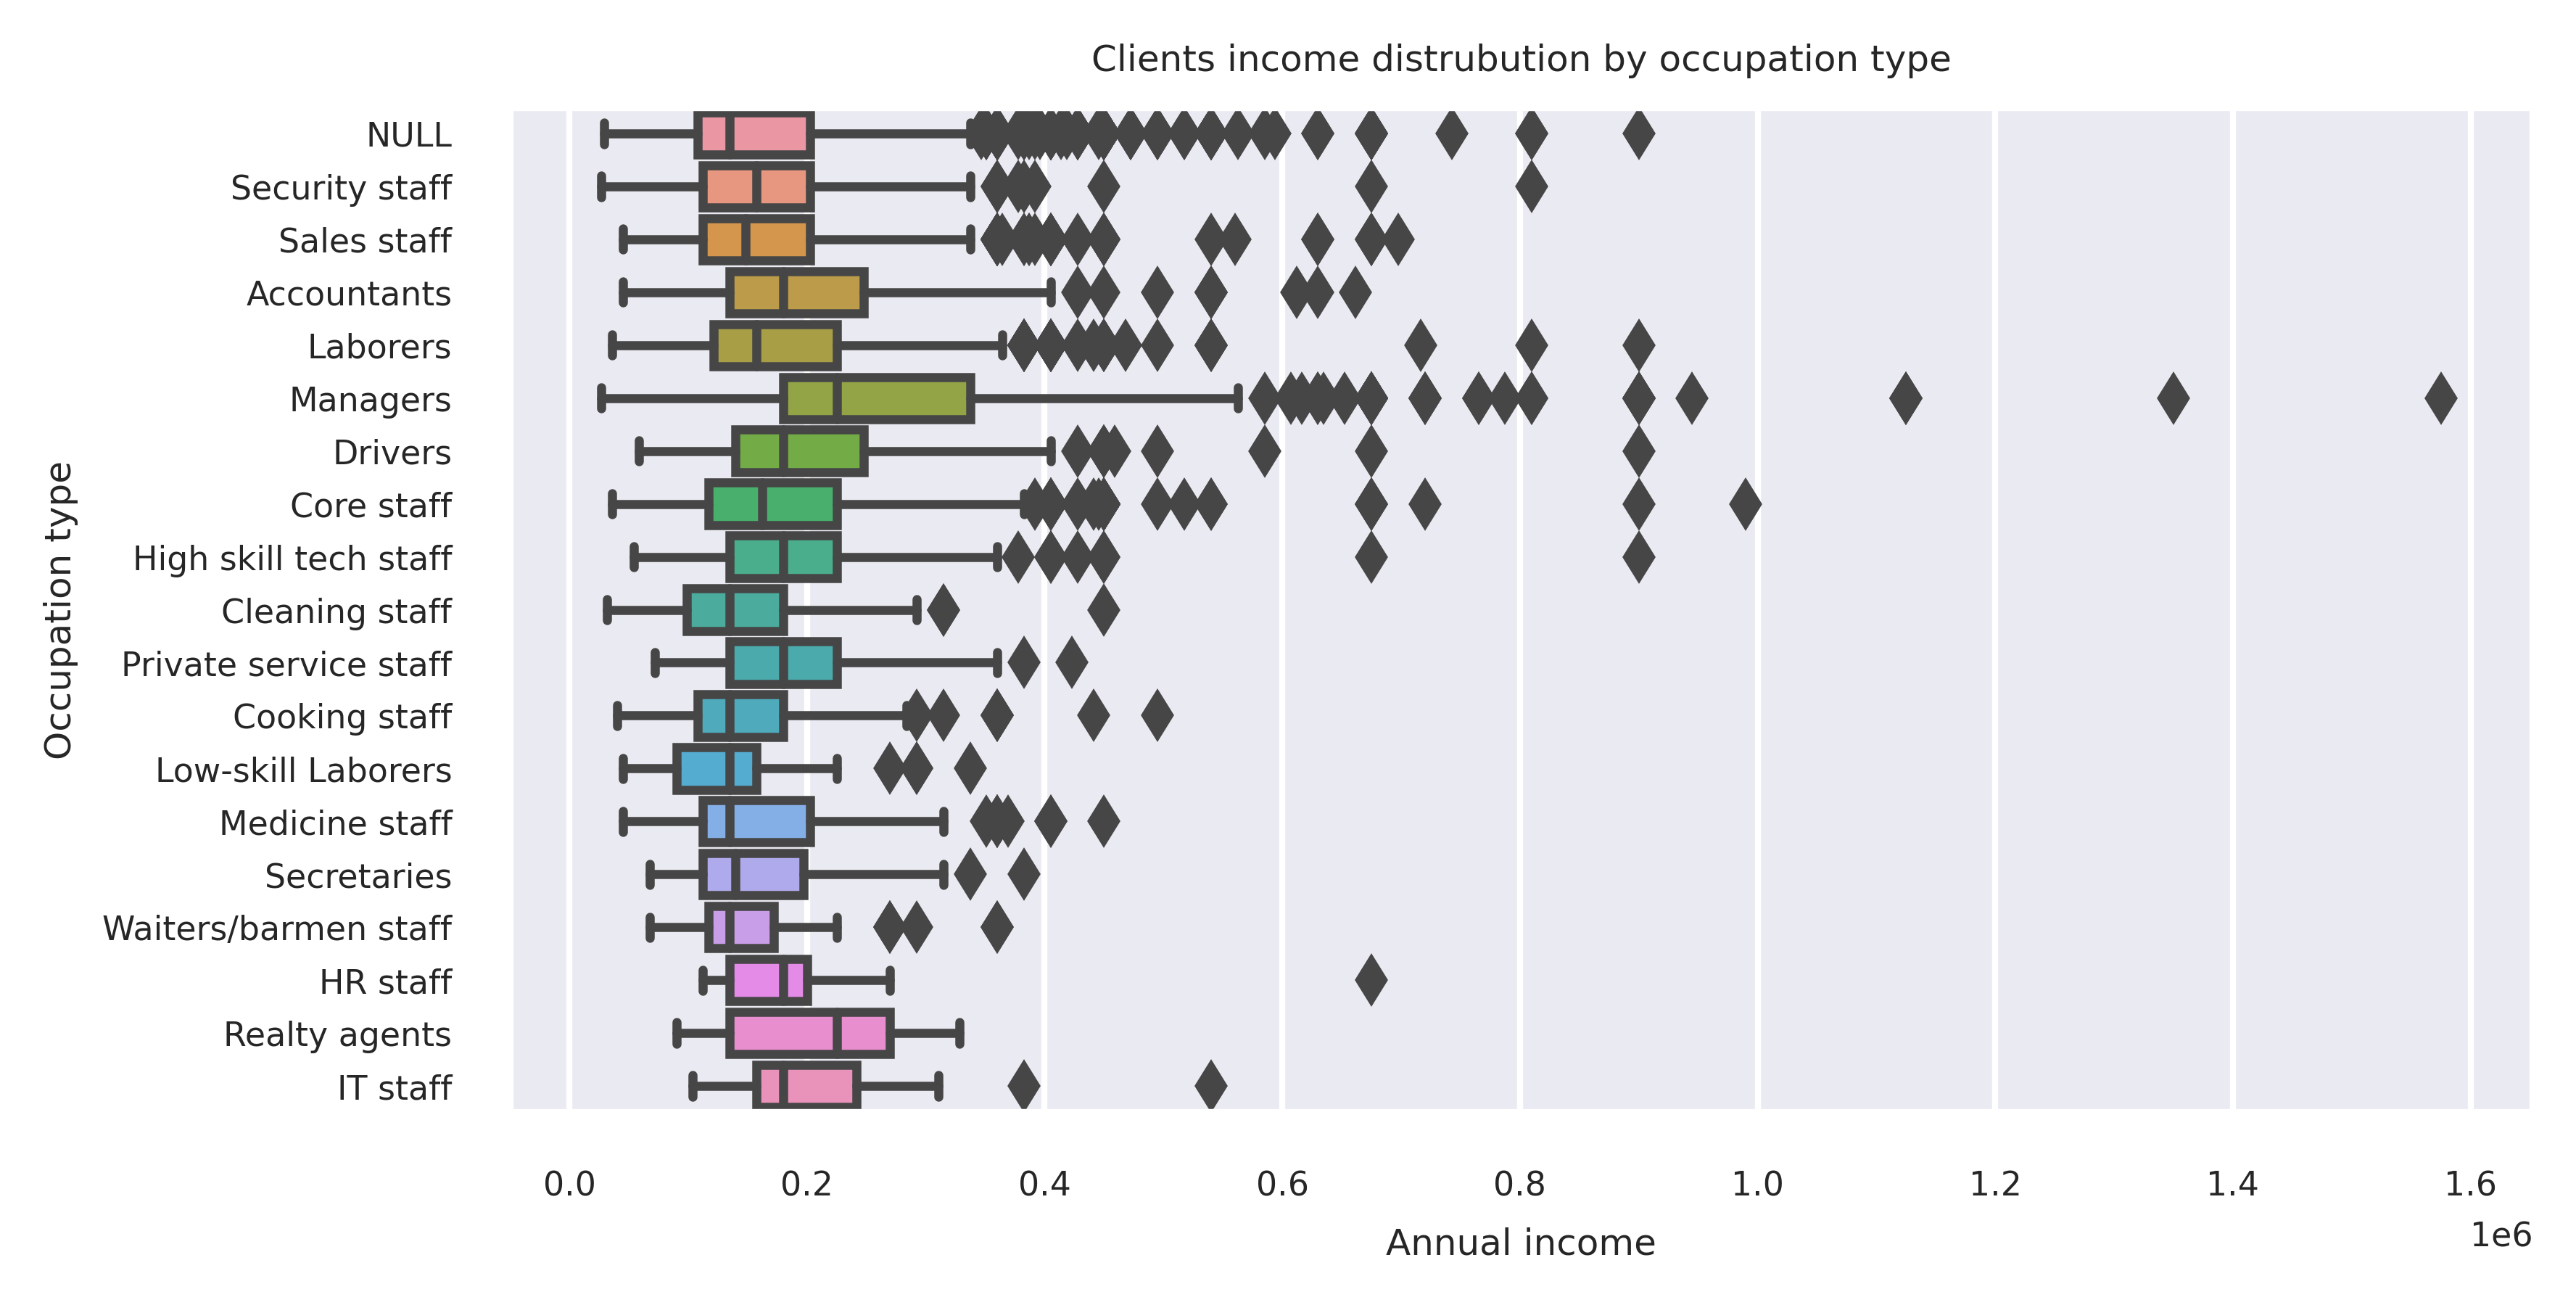

In [190]:
plot = sns.boxplot(data=newAppRec, x="AMT_INCOME_TOTAL", y="OCCUPATION_TYPE")
plot.set(xlabel='Annual income', ylabel='Occupation type')
plot.set_title('Clients income distrubution by occupation type')

based on box plot above the distribution of NA's value is mostly similar to Security Staff but with lower median and it contain alot of outliers unlike the other. 
we will se later if we ill merge this variable with other or keep as it is.
There is a sparsity in revenue and a lot of outliers

In [193]:
newAppRec = (newAppRec
             .assign(age = lambda x:[abs(int(i/365)) for i in x.DAYS_BIRTH],
                             unemployed = lambda x:[int(i>0) for i in x.DAYS_EMPLOYED],
                             monthEmployed = lambda x:[abs(int(min(i,0)/30))  for i in x.DAYS_EMPLOYED  ]
                            )
             .drop(columns = ['DAYS_EMPLOYED','DAYS_BIRTH'])
            )

In [194]:
#Let's see about categorical data 
sns.set(rc = {"figure.figsize":(18,16)})
fig, axis = plt.subplots(2, 2)
fig.tight_layout(pad=10.0)


p1= sns.countplot(y='NAME_HOUSING_TYPE',data=newAppRec, ax=axis.flatten()[0])
p1.set_yticklabels(p1.get_yticklabels(), rotation=45)
p1.set_title("Customer Distribution by Housing Type")
p1.set_xlabel("Count")
p1.set_ylabel("Housing Type")

p2= sns.countplot(y='NAME_EDUCATION_TYPE',data=newAppRec, ax=axis.flatten()[1])
p2.set_yticklabels(p2.get_yticklabels(), rotation=45)
p2.set_title("Customer Distribution by Education")
p2.set_xlabel("Count")
p2.set_ylabel("Education Type")


p3=sns.countplot(y='NAME_INCOME_TYPE',data=newAppRec, ax=axis.flatten()[2])
p3.set_yticklabels(p3.get_yticklabels(), rotation=45)
p3.set_title("Customer Distribution by Income Type")
p3.set_xlabel("Count")

p4=sns.countplot(y='NAME_FAMILY_STATUS',data=newAppRec, ax=axis.flatten()[3])
p4.set_yticklabels(p4.get_yticklabels(), rotation=45)
p4.set_title("Customer Distribution by Family Status")
p4.set_xlabel("Count")

Text(0.5, 853.4999999999998, 'Count')

variance for both variables **Housing Type** and Name **Family status** are **low**.
we need to addresses this issue later on 

In [195]:
M2 = (M2
             .assign(age = lambda x:[abs(int(i/365)) for i in x.DAYS_BIRTH],
                             unemployed = lambda x:[int(i>0) for i in x.DAYS_EMPLOYED],
                             monthEmployed = lambda x:[abs(int(min(i,0)/30))  for i in x.DAYS_EMPLOYED  ]
                            )
             .drop(columns = ['DAYS_EMPLOYED','DAYS_BIRTH'])
            )

In [197]:
M2 = (M2
           .assign(CODE_GENDER = lambda x:x.CODE_GENDER.replace(['F','M'],[0,1]),
                   FLAG_OWN_CAR = lambda x:x.FLAG_OWN_CAR.replace(["Y","N"],[1,0]),
                   FLAG_OWN_REALTY = lambda x:x.FLAG_OWN_REALTY.replace(["Y","N"],[1,0]),
                   NAME_INCOME_TYPE = lambda x: x.NAME_INCOME_TYPE.replace(['Commercial associate','State servant','Working','Pensioner','Student'],['w','w','w','p','s']),
                   NAME_EDUCATION_TYPE = lambda x:x.NAME_EDUCATION_TYPE.replace(['Secondary / secondary special','Lower secondary','Higher education','Incomplete higher','Academic degree'],['s','s','h','h','a']),
                NAME_FAMILY_STATUS = lambda x:x.NAME_FAMILY_STATUS.replace(['Single / not married','Separated','Widow','Civil marriage','Married'],[0,0,0,1,1]),
                    
                   )
             .drop(columns=['FLAG_MOBIL','NAME_HOUSING_TYPE','FLAG_EMAIL'])
             
              
          )

In [200]:
M2.set_index('ID',inplace=True)
M2.head()

groupedID  numerber0  Flaged  OpenedAcc  Active  CODE_GENDER  \
ID                                                                      
5142456          0          1       0          1       1            0   
5010020          1          5       0          2       2            0   
5010021          1          1       0          1       1            0   
5142898          2          1       0          1       1            0   
5142899          2         15       0          2       2            0   

         FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  \
ID                                                                       
5142456             0                0             0           67500.0   
5010020             0                0             0           99000.0   
5010021             0                0             0           99000.0   
5142898             0                0             0          112500.0   
5142899             0                0             0          112500.0   

        NAME_INCOME_TYPE NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
ID                                                                 
5142456                w                   h                   0   
5010020                w                   h                   0   
5010021                w                   h                   0   
5142898                w                   h                   0   
5142899                w                   h                   0   

         FLAG_WORK_PHONE  FLAG_PHONE OCCUPATION_TYPE  CNT_FAM_MEMBERS  STATUS  \
ID                                                                              
5142456                0           1      Core staff              1.0       1   
5010020                0           0            NULL              1.0       0   
5010021                0           0            NULL              1.0       0   
5142898                0           0        Laborers              1.0       0   
5142899                0           0        Laborers              1.0       0   

         MONTHS_BALANCE_Open  age  unemployed  monthEmployed  
ID                                                            
5142456                   55   51           0             16  
5010020                    3   29           0             83  
5010021                    0   29           0             83  
5142898                   32   24           0              7  
5142899                   45   24           0              7

we notice that there is alot of categorical variable.  
we need to to transforme those variables to something that we can use.  

In [204]:
import category_encoders as ce
M2.STATUS = M2.STATUS.astype(int)

In [207]:
cat_columns = [ 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
        'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
        'OCCUPATION_TYPE','unemployed']

In [210]:

encoder = ce.WOEEncoder(cols=cat_columns)
encoder.fit(M2[cat_columns],M2.STATUS)

WOEEncoder(cols=['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
                 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
                 'NAME_FAMILY_STATUS', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
                 'OCCUPATION_TYPE', 'unemployed'])

In [211]:

WOE = encoder.transform(M2[cat_columns])

In [212]:
WOE.describe()

CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  NAME_INCOME_TYPE  \
count  36457.000000  36457.000000     36457.000000      36457.000000   
mean      -0.006569     -0.000524        -0.013574         -0.005107   
std        0.115186      0.033060         0.164802          0.110634   
min       -0.087387     -0.042779        -0.128660         -0.053886   
25%       -0.087387     -0.042779        -0.128660         -0.053886   
50%       -0.087387      0.025342        -0.128660         -0.053886   
75%        0.157594      0.025342         0.222415         -0.053886   
max        0.157594      0.025342         0.222415          1.575508   

       NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  FLAG_WORK_PHONE    FLAG_PHONE  \
count         36457.000000        36457.000000     36457.000000  36457.000000   
mean              0.000264           -0.007940        -0.000975     -0.000090   
std               0.050728            0.125139         0.044461      0.013607   
min              -0.032314           -0.076749        -0.024967     -0.008889   
25%              -0.032314           -0.076749        -0.024967     -0.008889   
50%              -0.032314           -0.076749        -0.024967     -0.008889   
75%               0.071341           -0.076749        -0.024967      0.020955   
max               0.563908            0.219635         0.081415      0.020955   

       OCCUPATION_TYPE    unemployed  
count     36457.000000  36457.000000  
mean         -0.000364     -0.000891  
std           0.232293      0.042356  
min          -0.678703     -0.019943  
25%          -0.063353     -0.019943  
50%           0.016015     -0.019943  
75%           0.132683     -0.019943  
max           1.386266      0.093273

In [213]:
encoder = ce.TargetEncoder(cols=cat_columns)
encoder.fit(M2[cat_columns],M2.STATUS)
TargetEncoded = encoder.transform(M2[cat_columns])

/home/hamza/VirtualEnv/Python39-tf/lib/python3.9/site-packages/category_encoders/target_encoder.py:122: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
/home/hamza/VirtualEnv/Python39-tf/lib/python3.9/site-packages/category_encoders/target_encoder.py:127: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


In [214]:
TargetEncoded.describe()

CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  NAME_INCOME_TYPE  \
count  36457.000000  36457.000000     36457.000000      3.645700e+04   
mean       0.016897      0.016897         0.016897      1.689662e-02   
std        0.001971      0.000560         0.002867      1.928249e-03   
min        0.015514      0.016181         0.014894      7.670704e-07   
25%        0.015514      0.016181         0.014894      1.604278e-02   
50%        0.015514      0.017334         0.014894      1.604278e-02   
75%        0.019706      0.017334         0.021002      1.604278e-02   
max        0.019706      0.017334         0.021002      2.113134e-02   

       NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  FLAG_WORK_PHONE    FLAG_PHONE  \
count         3.645700e+04        36457.000000     36457.000000  36457.000000   
mean          1.689662e-02            0.016897         0.016897      0.016897   
std           9.369612e-04            0.002208         0.000727      0.000204   
min           5.815294e-16            0.015682         0.016504      0.016765   
25%           1.638106e-02            0.015682         0.016504      0.016765   
50%           1.638106e-02            0.015682         0.016504      0.016765   
75%           1.809473e-02            0.015682         0.016504      0.017213   
max           1.809473e-02            0.020912         0.018244      0.017213   

       OCCUPATION_TYPE    unemployed  
count     36457.000000  36457.000000  
mean          0.016897      0.016897  
std           0.004251      0.000685  
min           0.000000      0.016589  
25%           0.015604      0.016589  
50%           0.017133      0.016589  
75%           0.018533      0.016589  
max           0.050000      0.018419

In [215]:
 
encoder = ce.HashingEncoder(cols=cat_columns)
encoder.fit(M2[cat_columns],M2.STATUS)

HashingEncoder(cols=['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
                     'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
                     'NAME_FAMILY_STATUS', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
                     'OCCUPATION_TYPE', 'unemployed'],
               max_process=4, max_sample=9114)

In [216]:

Hashencoded = encoder.transform(M2[cat_columns])

In [217]:
trainingDataset = ((M2
                   .drop(columns=['OCCUPATION_TYPE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE'])
                   .merge(WOE,left_index=True, right_index=True))
                   .merge(TargetEncoded,left_index=True, right_index=True)
                   .merge(Hashencoded,left_index=True, right_index=True))

In [218]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
M2.STATUS = M2.STATUS.astype(int)

In [219]:
X_col = list(set(trainingDataset.columns) - set(['STATUS']))

In [220]:
scaler = MinMaxScaler()
X = (scaler.fit_transform(trainingDataset[X_col]))
pca = PCA(n_components=2,whiten=True,svd_solver='arpack')
X_r = pca.fit(X).transform(X)

In [222]:

pc_df = pd.DataFrame(data = X_r , 
        columns = ['PC1', 'PC2'])
pc_df['Cluster'] = trainingDataset.STATUS.values

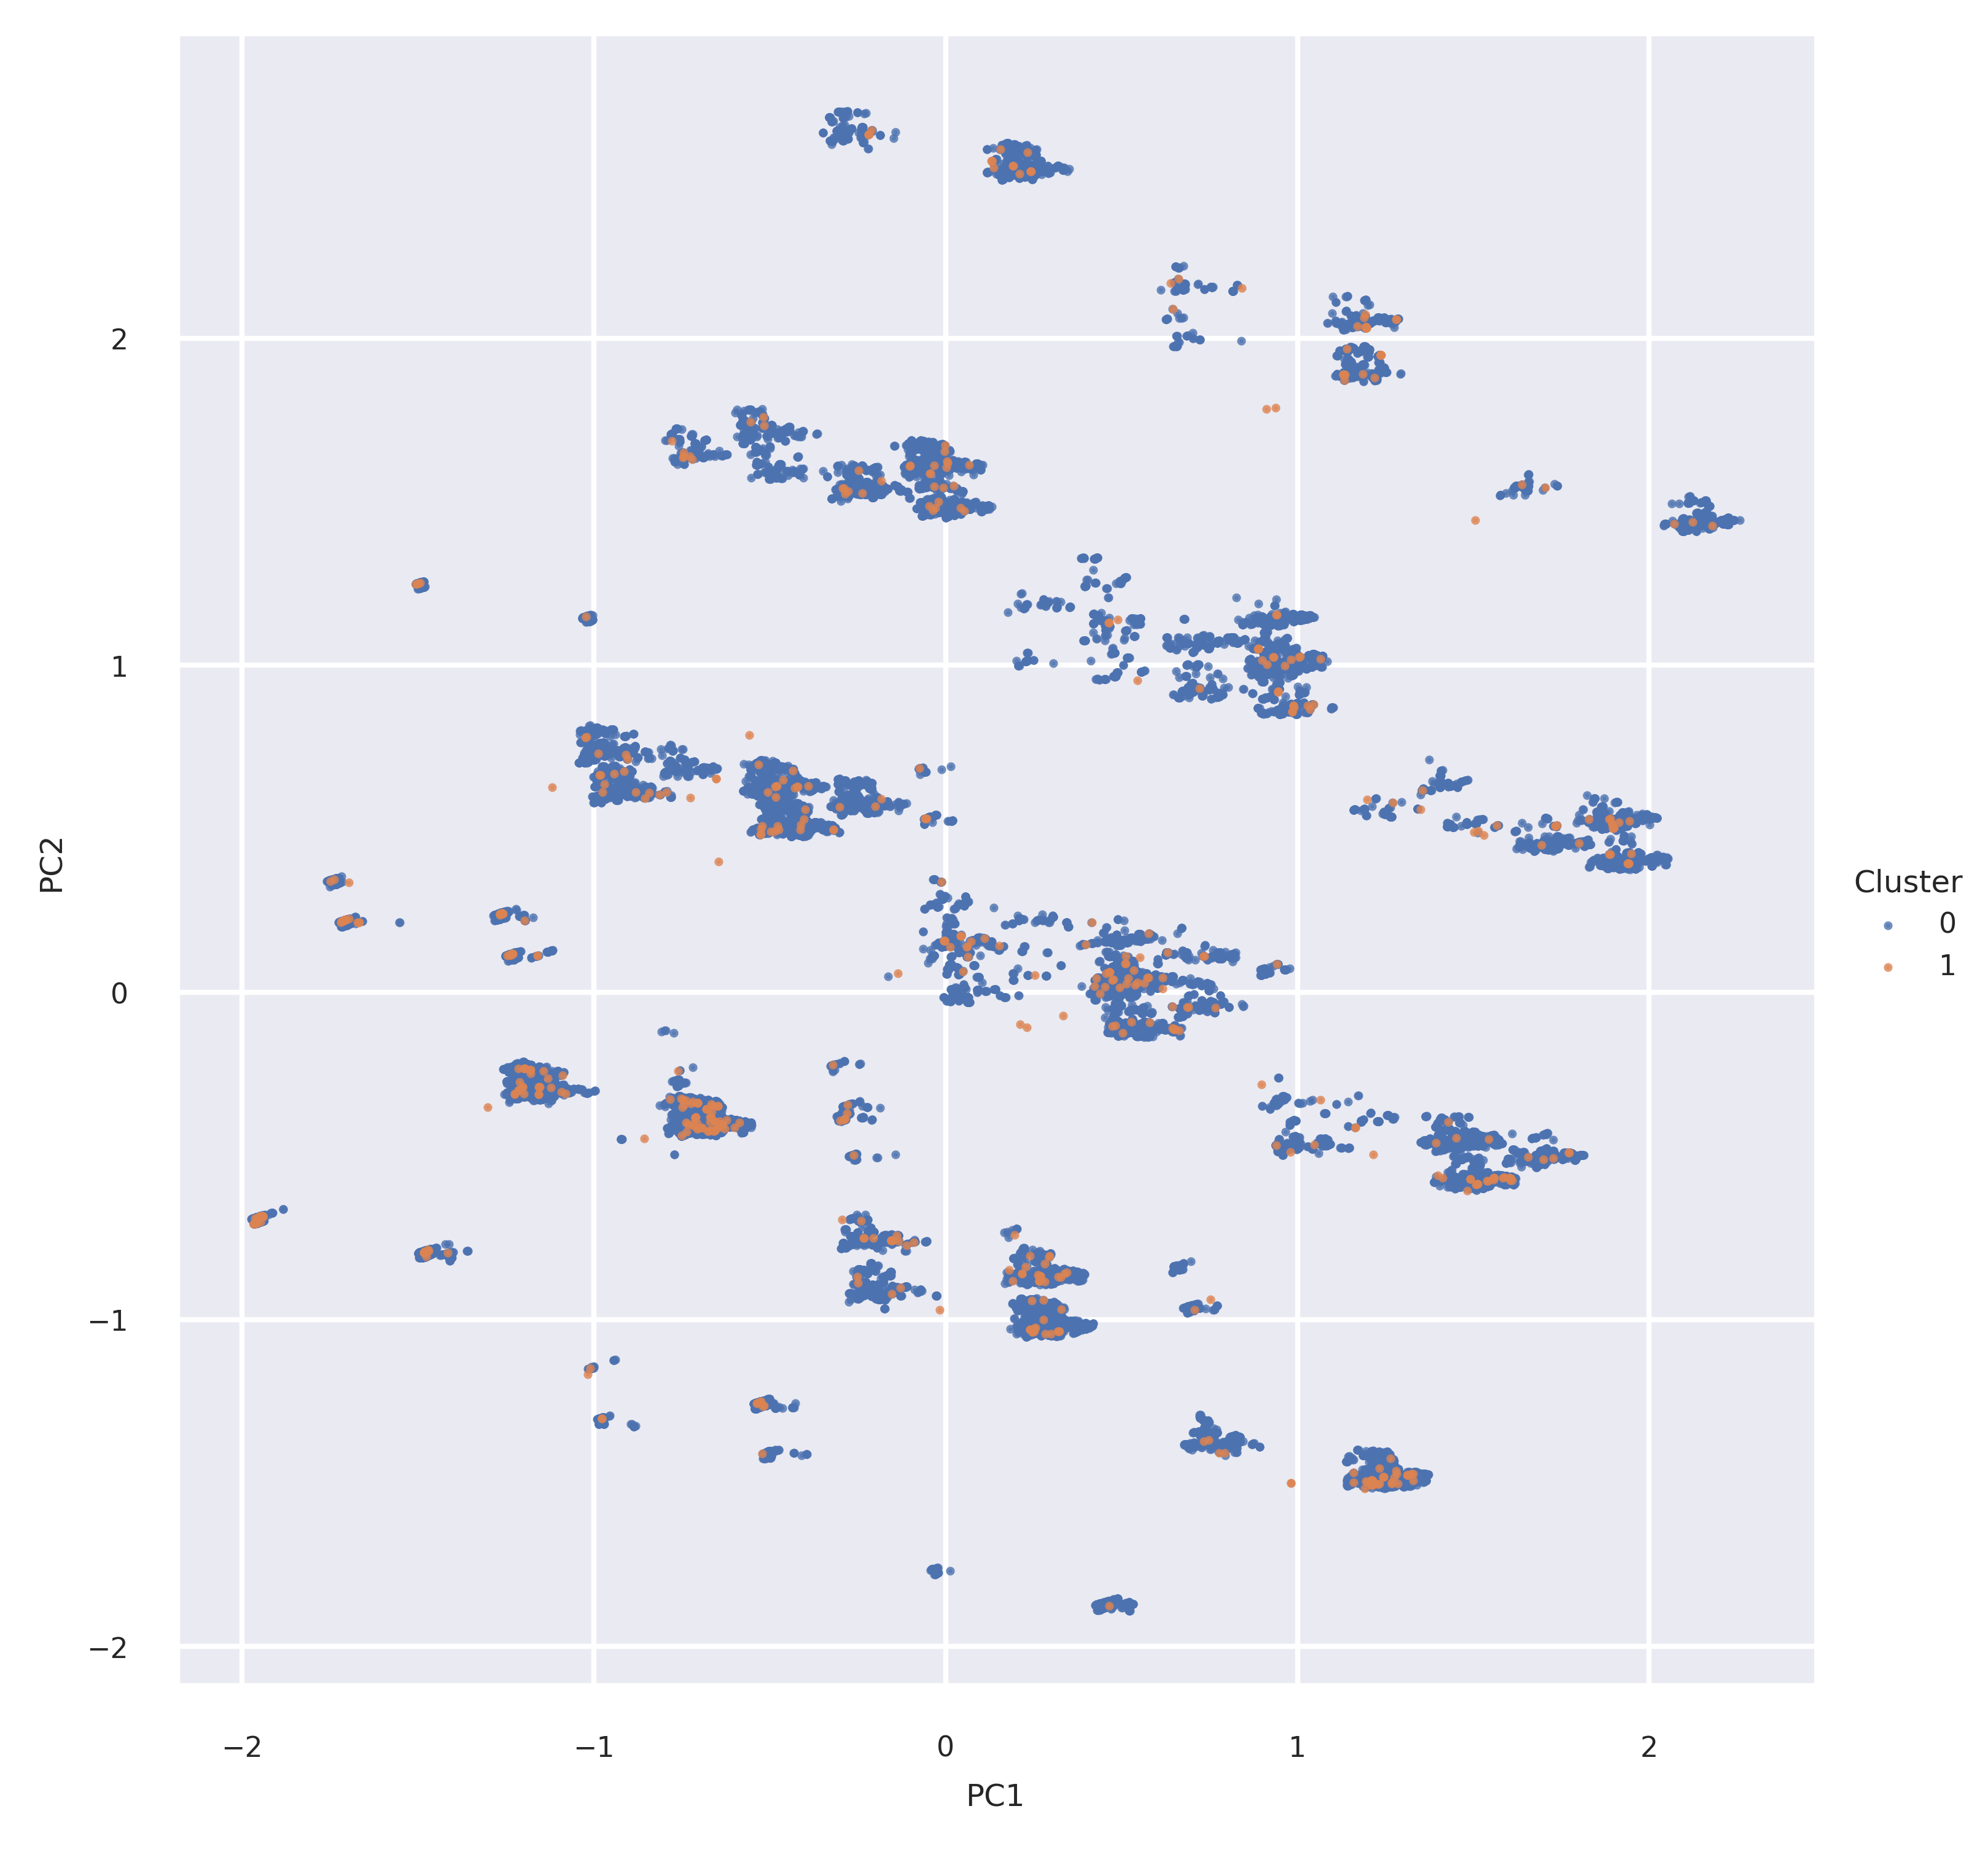

In [223]:

sns.set(rc = {"figure.figsize":(10,6)})
sns.set(font_scale=0.5)

sns.lmplot( x="PC1", y="PC2",
  data=pc_df, 
  fit_reg=False, 
  hue='Cluster', # color by cluster
  legend=True,
  scatter_kws={"s": 0.5}) # specify the point size

We notice that some of clusters contain lower ratio of 1 and 0 classes.  
But still most of onservation **target==1**  aren't distinct from **Target == 0**.

In [224]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2, learning_rate='auto',
                   init='random', perplexity=150,early_exaggeration=200).fit_transform(X)

In [225]:

pc_df = pd.DataFrame(data = X_embedded , 
        columns = ['x', 'y'])
pc_df['Cluster'] = trainingDataset.STATUS.values

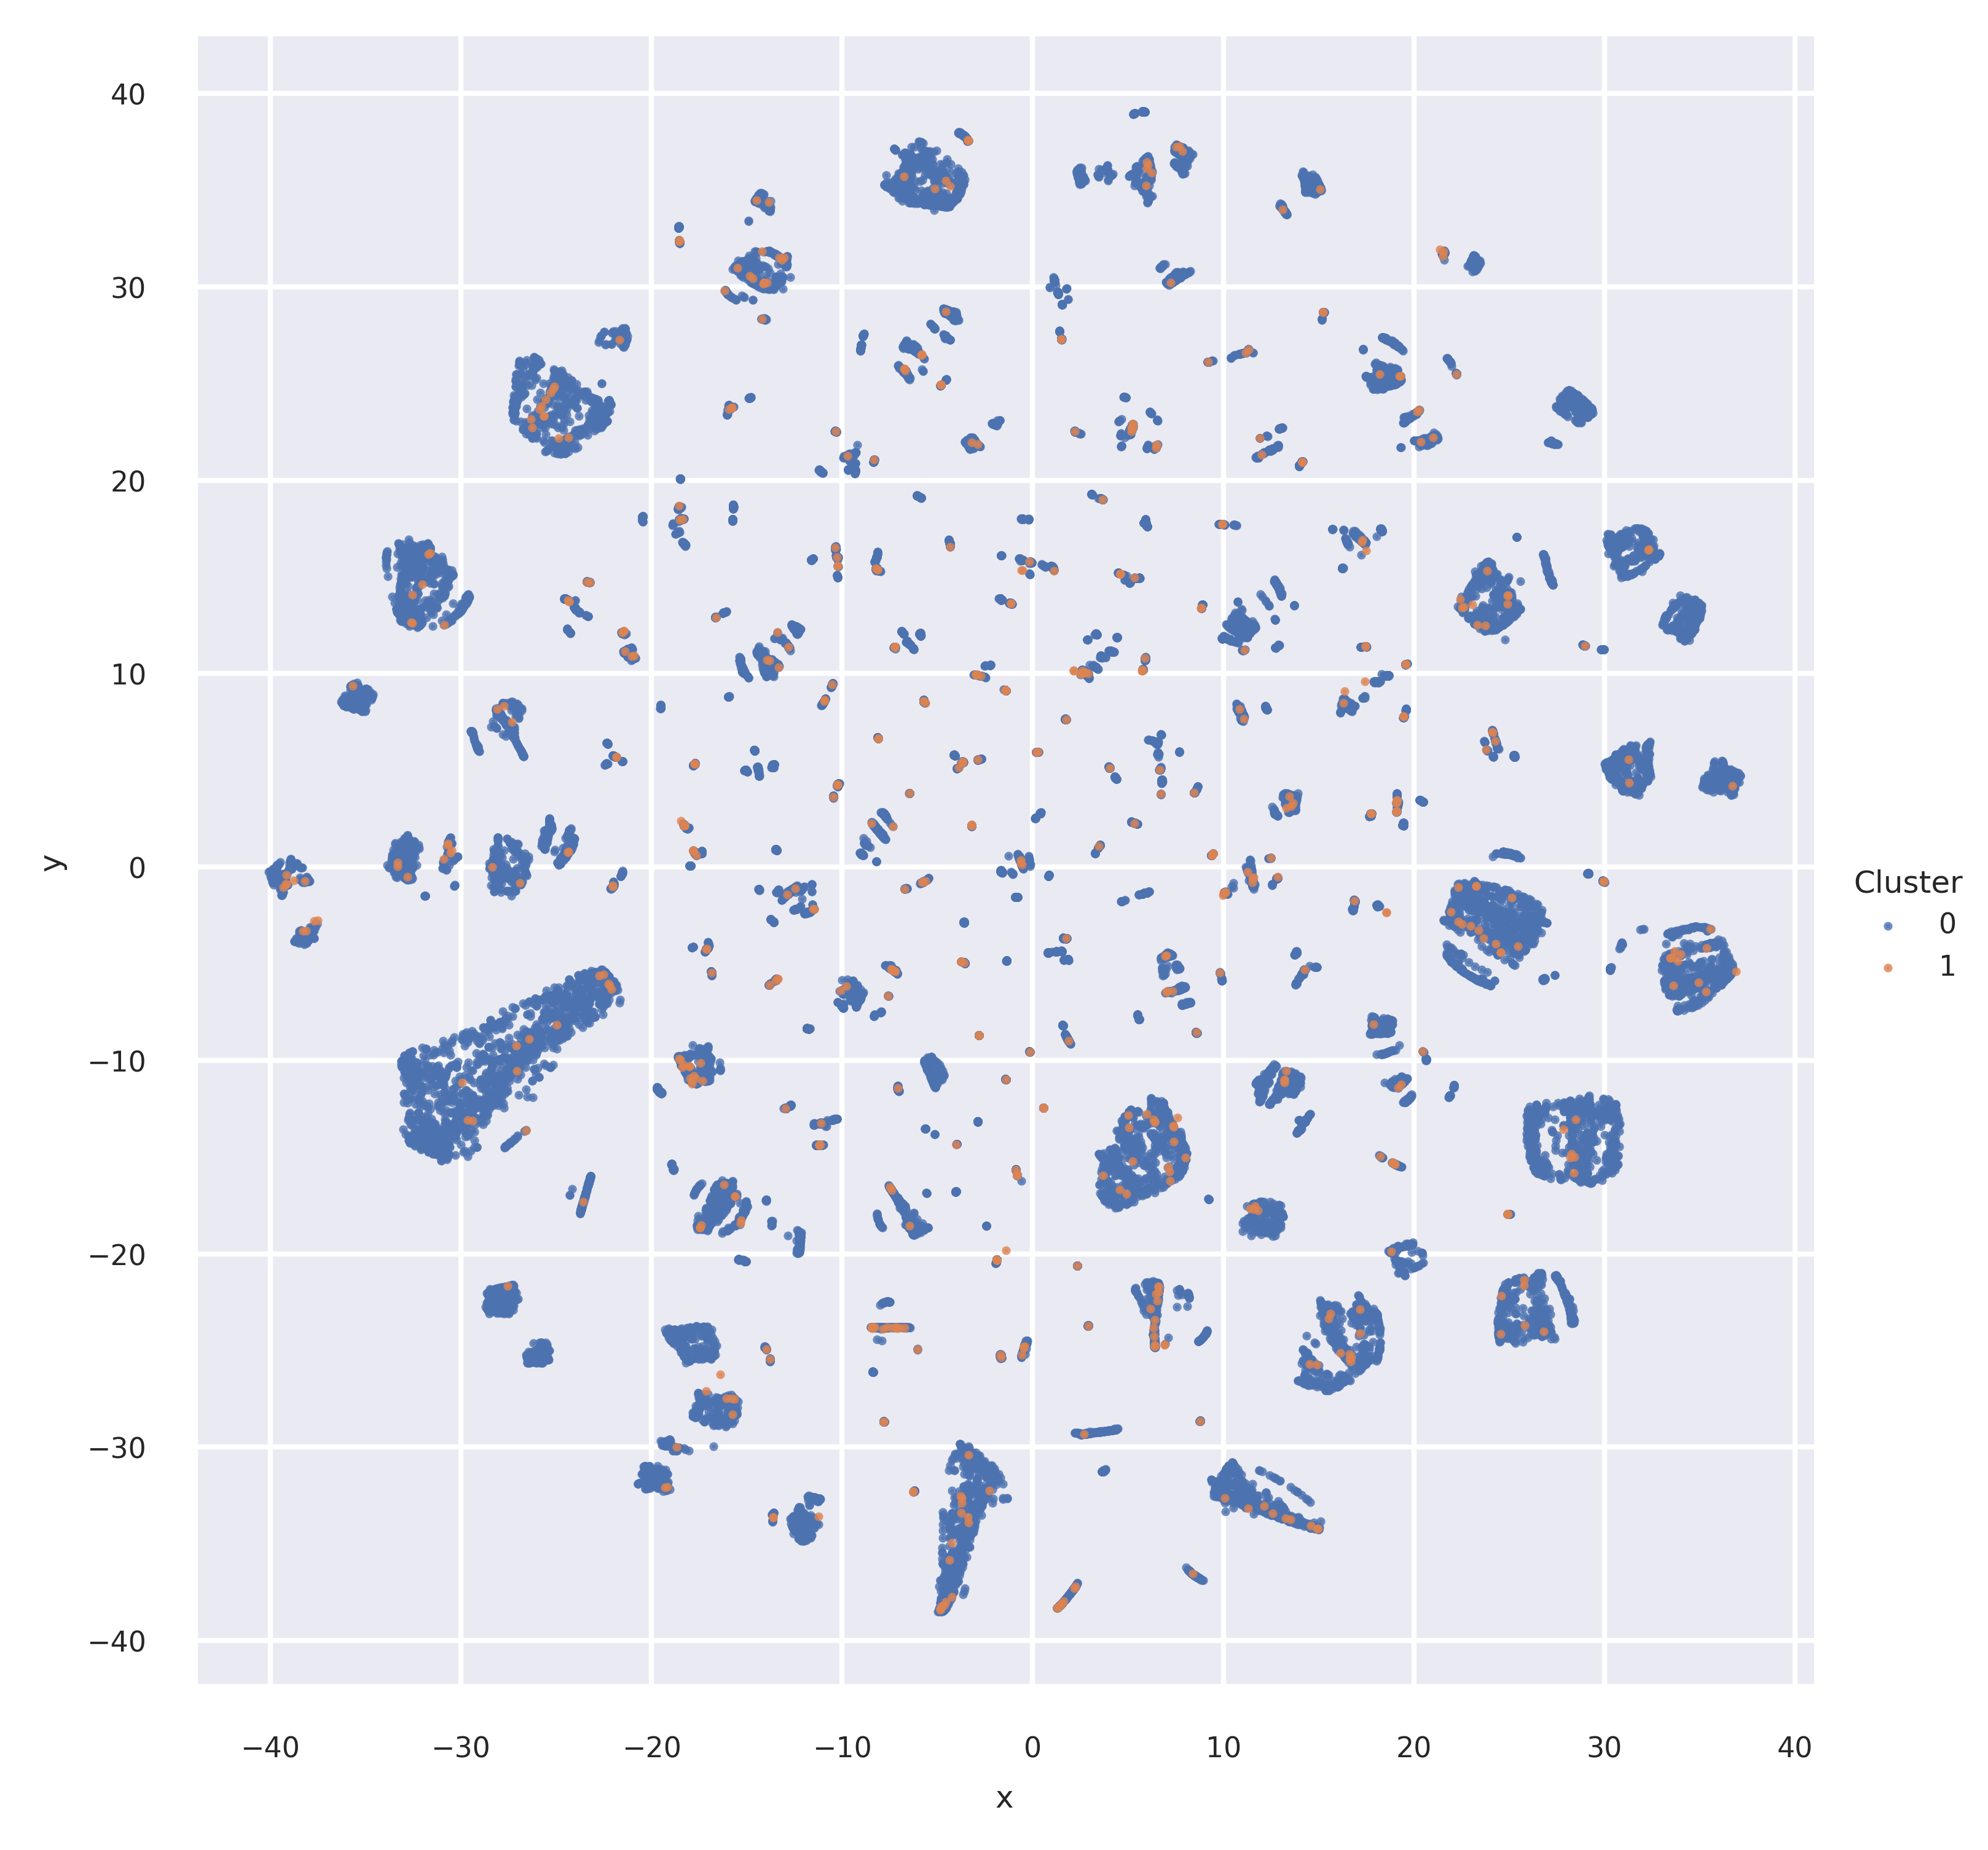

In [226]:

sns.set(rc = {"figure.figsize":(10,6)})
sns.set(font_scale=0.5)

sns.lmplot( x="x", y="y",
  data=pc_df, 
  fit_reg=False, 
  hue='Cluster', # color by cluster
  legend=True,
  scatter_kws={"s": 0.5}) # specify the point size

In [236]:
#New Variables:
trainingDataset = (trainingDataset
             .assign(household = lambda x: x.CNT_CHILDREN + x.NAME_FAMILY_STATUS+1)
             .assign(
                 = lambda x: x.AMT_INCOME_TOTAL/x.household ,
                     totalrevenue =  lambda x:(x.monthEmployed/12) * x.AMT_INCOME_TOTAL)
            
            )

# Modeling

In [260]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,roc_auc_score,f1_score,plot_confusion_matrix,plot_roc_curve,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [238]:
trainingDataset.drop(columns=['groupedID'],inplace=True)

In [239]:
trainingDataset

numerber0  Flaged  OpenedAcc  Active  CODE_GENDER_x  FLAG_OWN_CAR_x  \
ID                                                                             
5142456          1       0          1       1              0               0   
5010020          5       0          2       2              0               0   
5010021          1       0          1       1              0               0   
5142898          1       0          1       1              0               0   
5142899         15       0          2       2              0               0   
...            ...     ...        ...     ...            ...             ...   
5118331          1       0          1       1              0               0   
5061207          1       0          1       1              1               1   
5061210         90       0          3       3              1               1   
5061211         17       0          2       2              1               1   
5105054          1       0          1       1              0               0   

         FLAG_OWN_REALTY_x  CNT_CHILDREN  AMT_INCOME_TOTAL  \
ID                                                           
5142456                  0             0           67500.0   
5010020                  0             0           99000.0   
5010021                  0             0           99000.0   
5142898                  0             0          112500.0   
5142899                  0             0          112500.0   
...                    ...           ...               ...   
5118331                  0             7          157500.0   
5061207                  1            14          225000.0   
5061210                  1            14          225000.0   
5061211                  1            14          225000.0   
5105054                  1            19          112500.0   

         NAME_FAMILY_STATUS_x  FLAG_WORK_PHONE_x  FLAG_PHONE_x  \
ID                                                               
5142456                     0                  0             1   
5010020                     0                  0             0   
5010021                     0                  0             0   
5142898                     0                  0             0   
5142899                     0                  0             0   
...                       ...                ...           ...   
5118331                     1                  1             1   
5061207                     0                  0             0   
5061210                     0                  0             0   
5061211                     0                  0             0   
5105054                     0                  1             1   

         CNT_FAM_MEMBERS  STATUS  MONTHS_BALANCE_Open  age  unemployed_x  \
ID                                                                         
5142456              1.0       1                   55   51             0   
5010020              1.0       0                    3   29             0   
5010021              1.0       0                    0   29             0   
5142898              1.0       0                   32   24             0   
5142899              1.0       0                   45   24             0   
...                  ...     ...                  ...  ...           ...   
5118331              9.0       0                   29   37             0   
5061207             15.0       0                    2   48             0   
5061210             15.0       0                   53   48             0   
5061211             15.0       0                   17   48             0   
5105054             20.0       0                   55   30             0   

         monthEmployed  CODE_GENDER_y  FLAG_OWN_CAR_y  FLAG_OWN_REALTY_y  \
ID                                                                         
5142456             16      -0.087387        0.025342           0.222415   
5010020             83      -0.087387        0.025342           0.222415   
5010021  

In [246]:
X_cols = list(set(trainingDataset.columns) - set(['STATUS']))

In [273]:
#splitting data into train-test

X_train, X_test, y_train, y_test = train_test_split(trainingDataset[X_cols], trainingDataset.STATUS.values, random_state=100, test_size=0.3)
print(X_train.shape)

(25519, 48)


In [274]:
y_train = y_train.astype('int')
X_balance,Y_balance = SMOTE().fit_resample(X_train,y_train)


In [275]:
X_balance = pd.DataFrame(X_balance, columns = X_train.columns)
Y_balance = pd.DataFrame(Y_balance, columns=["STATUS"])

In [277]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_balance)

X_train = pd.DataFrame(scaler.transform(X_balance), columns=[X_balance.columns])

In [278]:
classifiers = {
    "LogisticRegression" : LogisticRegression(),
    "KNeighbors" : KNeighborsClassifier(),
    "DecisionTree" : DecisionTreeClassifier(),
    "RandomForest" : RandomForestClassifier(n_estimators=150,max_depth=10,min_samples_leaf=16),
    "XGBoost" : XGBClassifier(max_depth=12,
                              n_estimators=250,
                              min_child_weight=8, 
                              subsample=0.8, 
                              learning_rate =0.02,    
                              seed=42),
    "CatBoost" : CatBoostClassifier(iterations=250,
                           learning_rate=0.2,
                           od_type='Iter',
                           verbose=25,
                           depth=16,
                           random_seed=42)
}

In [279]:
result_table = pd.DataFrame(columns=['classifiers','accuracy','presicion','recall','f1_score','fpr','tpr','auc'])

y_test = y_test.astype(int)


In [280]:
#Looping onver models and build score dataset
for key, classifier in classifiers.items():
    classifier.fit(X_balance, Y_balance)
    y_predict = classifier.predict(X_test)
    
    yproba = classifier.predict_proba(X_test)[::,1]    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    conf_matrix = confusion_matrix(y_test,y_predict)
    
    result_table = result_table.append({'classifiers':key,
                                        'accuracy':accuracy_score(y_test, y_predict),
                                        'presicion':precision_score(y_test, y_predict, average='weighted'),
                                        'recall':recall_score(y_test, y_predict, average='weighted'),
                                        'f1_score':f1_score(y_test, y_predict, average='weighted'),
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc
                                         }, ignore_index=True)
        
result_table.set_index('classifiers', inplace=True)


0:	learn: 0.4242416	total: 2.97s	remaining: 12m 20s
25:	learn: 0.0259170	total: 1m 21s	remaining: 11m 44s
50:	learn: 0.0127707	total: 2m 34s	remaining: 10m 3s
75:	learn: 0.0082145	total: 3m 52s	remaining: 8m 53s
100:	learn: 0.0060926	total: 5m 16s	remaining: 7m 46s
125:	learn: 0.0055397	total: 6m 32s	remaining: 6m 25s
150:	learn: 0.0053795	total: 7m 48s	remaining: 5m 7s
175:	learn: 0.0048611	total: 8m 56s	remaining: 3m 45s
200:	learn: 0.0047751	total: 10m 13s	remaining: 2m 29s
225:	learn: 0.0047400	total: 11m 21s	remaining: 1m 12s
249:	learn: 0.0047389	total: 12m 32s	remaining: 0us


In [281]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

for cls, ax in zip(list(classifiers.values()), axes.flatten()):
    plot_confusion_matrix(cls, 
                          X_test, 
                          y_test, 
                          ax=ax, 
                          cmap='Reds')
    ax.title.set_text(type(cls).__name__)
plt.tight_layout()  
plt.show()

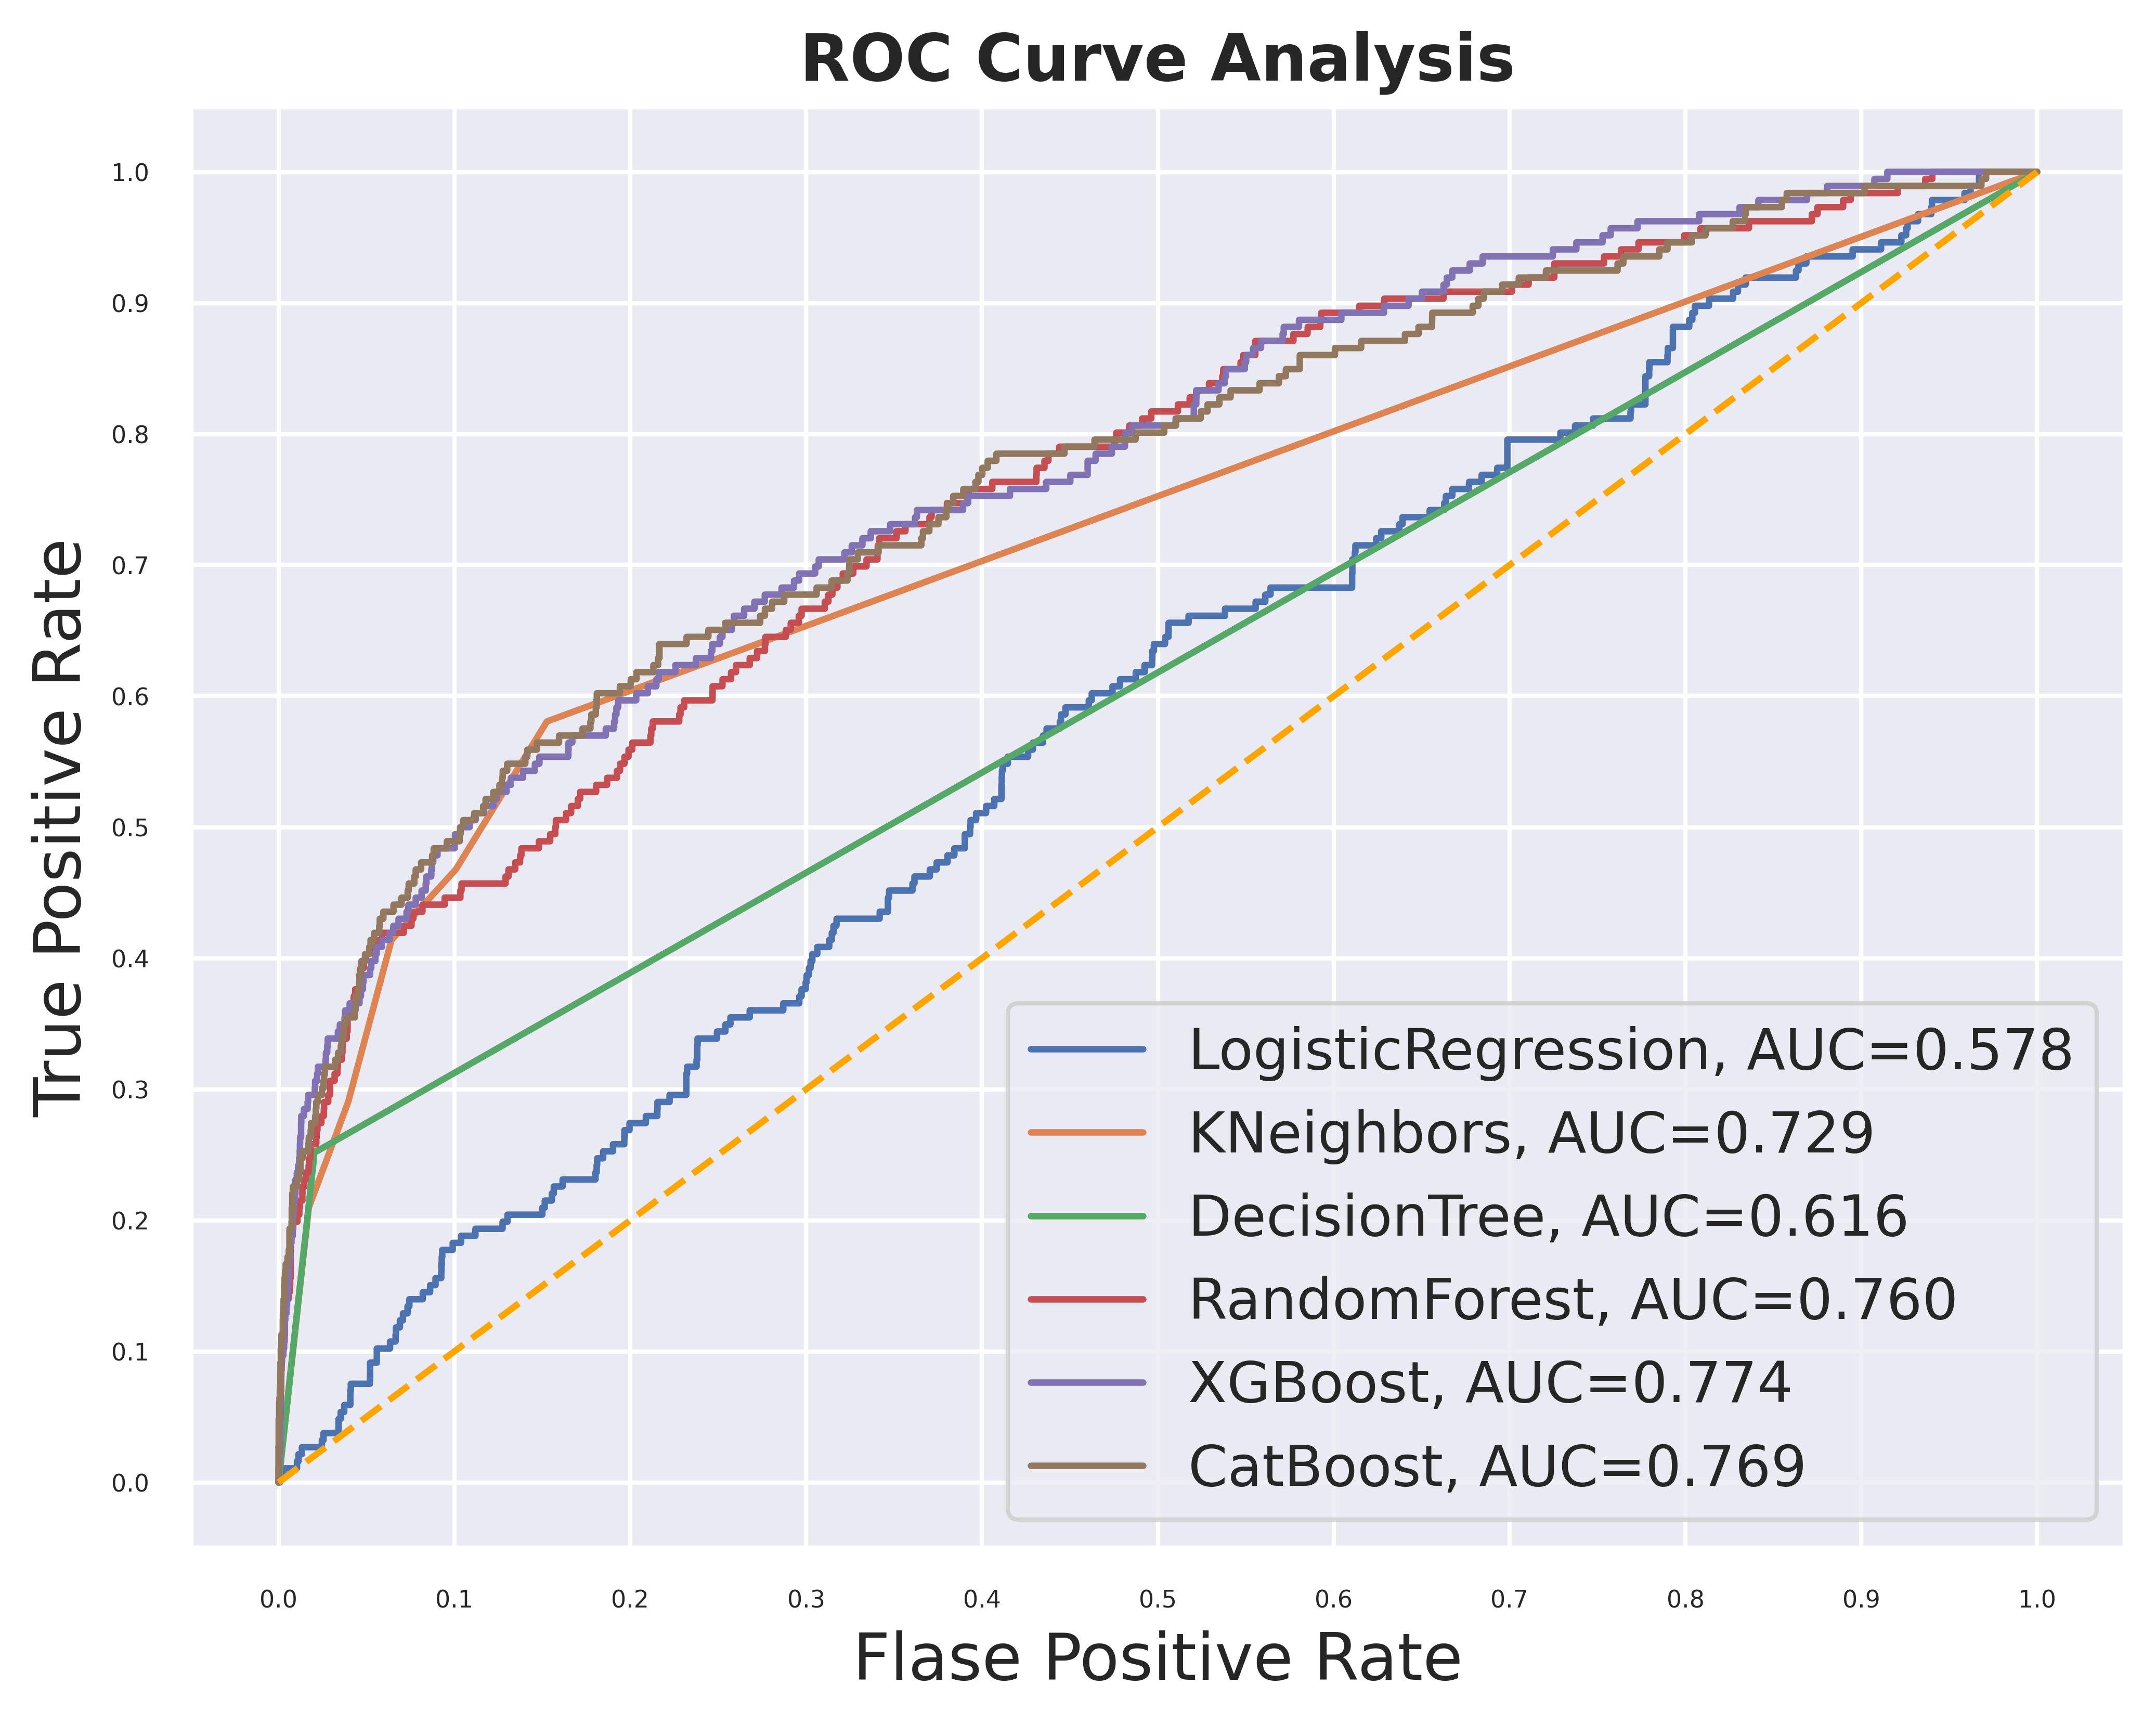

In [282]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()